<a href="https://colab.research.google.com/github/Bhavanimudhiraj/Bhavanimudhiraj/blob/main/Servo_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Servo Prediction using Linear Regression

# *Import Library*

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

# Objective:
Servomechanisms, sometimes shortened to servo, are an automatic device that correct the action of certain mechanisms by using error-sensors. When a servomechanism receives negative feedback, they’re able to course-correct the action.
A dataframe with 167 observations 5 variables 4 nominals and one as the target class.This dataset from simulation of a servosystem involving a servo amplifier,a motor,a lead screw,and a sliding carriage of some sort,It may have been on of the translational axes of a robot on the 9th floor of the AL lab.In any case the output value is almost certainly a raise time.or the time required for the system to respond to a step change in a position set point.The variables that describe the data set and their values are the following:

1.Motor A,B,C,D,E

2.Screw A,B,C,D,E

3.Pgain 3,4,5,6

4.Vgain 1,2,3,4,5

5.Class 0.13 to 7.10

# Import CSV as DataFrame

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/Servo%20Mechanism.csv')

# Get the First Five Rows of Dataframe

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# Get the Information of Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# Get the Summary Statistics

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# Get Column Names

In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Get Shape of Dataframe

In [ ]:
df.shape

(167, 5)

# Get Catagories and count of Catagorical Variables

In [ ]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [ ]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


# Get Encoding of Catagorical Features

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

# Define Y and X

In [ ]:
y=df['Class']

In [ ]:
y.shape

(167,)

In [ ]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [ ]:
X=df[['Motor','Screw','Pgain','Vgain']]

In [ ]:
X=df.drop(['Class'],axis=1)

In [ ]:
X.shape

(167, 4)

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Get Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

# Get Model Train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

# Get Model Prediction

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred.shape

(51,)

In [ ]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# Get Model Evalution

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [ ]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [ ]:
r2_score(y_test,y_pred)

0.6807245170563927

# Get Visualization of Actual Vs Predicted Results

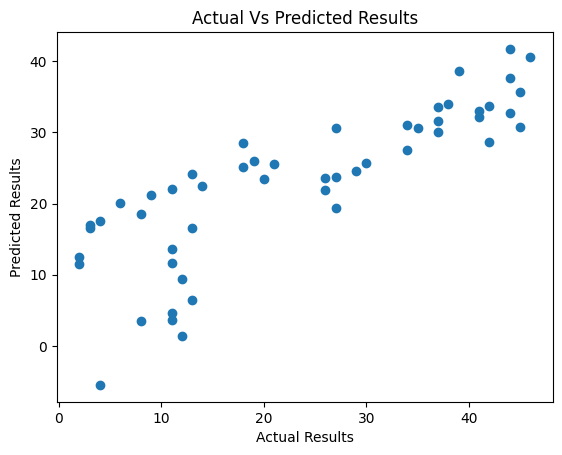

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Results')
plt.ylabel('Predicted Results')
plt.title('Actual Vs Predicted Results')
plt.show()

# Get Future Predictons

In [ ]:
X_new=df.sample(1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain,Class
151,4,4,3,1,17


In [ ]:
X_new.shape

(1, 5)

In [ ]:
X_new=X_new.drop(['Class'],axis=1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain
151,4,4,3,1


In [ ]:
X_new.shape

(1, 4)

In [ ]:
y_pred_new =lr.predict(X_new)

In [ ]:
y_pred_new

array([19.97581938])